<a href="https://colab.research.google.com/github/RyanAleixo/Profiss-o-Cientista-de-Dados-v2/blob/main/Profissao_Cientista_de_Dados_M21_Pratique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MÓDULO 21 - Projeto de Credit Score - Árvore de Decisão**


No módulo 17, vocês realizaram a primeira etapa do projeto de crédito de vocês. Então fizeram o tratamendo dos dados, balancearam as classes, transformaram as variáveis categóricas e separam base de treino e teste. Já no módulo 14, aplicaram a base já tratada o algoritmo de Naive Bayes, onde avaliaram os resultados das previsões. Nesse módulo aplicaremos a nossa base o algoritmo da árvore de decisão.

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, ConfusionMatrixDisplay
from google.colab import files
import io

# 1) Comece carregando as bases de treino (X e y) e teste (X e y).
Verifique se o número de linhas condiz, se as variáveis estão corretas sendo apenas a de score para y e as demais nas bases de X e por último, se Y está balanceada no teste.

In [2]:
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[file_name]), delimiter=',')
print(df.head())

Saving dados.csv to dados.csv
   Age    Income  Number of Children  Credit_Score_Encoded  Education_Encoded  \
0   25   50000.0                   0                     2                  3   
1   30  100000.0                   2                     2                  4   
2   35   75000.0                   1                     2                  5   
3   40  125000.0                   0                     2                  1   
4   45  100000.0                   3                     2                  3   

   Gender_Male  Marital Status_Single  Home Ownership_Rented  
0        False                   True                   True  
1         True                  False                  False  
2        False                  False                  False  
3         True                   True                  False  
4        False                  False                  False  


In [5]:
# Definindo X (características) e y (alvo)
X = df.drop(columns=['Credit_Score_Encoded'])
y = df['Credit_Score_Encoded']

# Dividindo em Treino (80%) e Teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# A. Verificação do número de linhas e colunas
print(f"Shape Treino: X={X_train.shape}, y={y_train.shape}")
print(f"Shape Teste:  X={X_test.shape}, y={y_test.shape}")

# B. Verificação das variáveis (se y está apenas em y e não em X)
print(f"\nVariável 'Credit_Score_Encoded' está em X? {'Sim' if 'Credit_Score_Encoded' in X.columns else 'Não'}")

# C. Verificação de balanceamento no Teste (y_test)
print("\nDistribuição das classes em y_test:")
print(y_test.value_counts(normalize=True) * 100) # Mostra em porcentagem

Shape Treino: X=(131, 7), y=(131,)
Shape Teste:  X=(33, 7), y=(33,)

Variável 'Credit_Score_Encoded' está em X? Não

Distribuição das classes em y_test:
Credit_Score_Encoded
2    69.696970
1    15.151515
0    15.151515
Name: proportion, dtype: float64


# 2) Explique com suas palavras, qual o passo a passo para a aplicação do algoritmo da árvore de decisão, não esqueça de citar a etapa de avaliação do modelo e também como podemos melhorar nosso modelo.

A aplicação da Árvore de Decisão consiste em transformar os dados de crédito em um conjunto de regras lógicas estruturadas como um fluxograma, onde o algoritmo seleciona as variáveis mais relevantes (como renda ou idade) para criar divisões hierárquicas através de nós de decisão até chegar a uma classificação final nas "folhas". Após a construção, a etapa de avaliação utiliza métricas como acurácia e recall para verificar se o modelo identifica corretamente os perfis de risco, enquanto a melhoria do desempenho é alcançada através do ajuste de hiperparâmetros (como a profundidade máxima), da "poda" de ramos desnecessários para evitar que o modelo apenas decore o treino (overfitting), ou da implementação de métodos de conjunto (ensembles), como o Random Forest, que combina múltiplas árvores para aumentar a precisão e a estabilidade das previsões.

# 3) Aplique o algortimo da árvore de decisão aos dados de treinamento, utilizando critério de Gini e random state = 0.
Traga a acurácia para o modedlo com os dados de treino.

In [7]:
# 1. Inicializar o modelo com critério Gini e semente fixa (random_state=0)
modelo_arvore = DecisionTreeClassifier(criterion='gini', random_state=0)

# 2. Treinar o modelo utilizando as bases de treinamento X e y
modelo_arvore.fit(X_train, y_train)

print("Modelo de Árvore de Decisão treinado com sucesso!")

Modelo de Árvore de Decisão treinado com sucesso!


# 4) Aplique o modelo aos dados de teste e realize a avaliação dos resultados. Não se esqueça de avaliar com as suas palavras e comparar o desempenho da base treino com a teste.

In [10]:
# 1. Fazendo previsões com os dados de teste
y_pred_arvore_test = modelo_arvore.predict(X_test)

# 2. Calculando métricas
acc_arvore_test = accuracy_score(y_test, y_pred_arvore_test)
recall_arvore_test = recall_score(y_test, y_pred_arvore_test, average='macro')

print(f"--- Árvore de Decisão: Métricas de Teste ---")
print(f"Acurácia: {acc_arvore_test:.4f}")
print(f"Recall (Macro): {recall_arvore_test:.4f}")

--- Árvore de Decisão: Métricas de Teste ---
Acurácia: 0.9394
Recall (Macro): 0.9710


<Figure size 800x600 with 0 Axes>

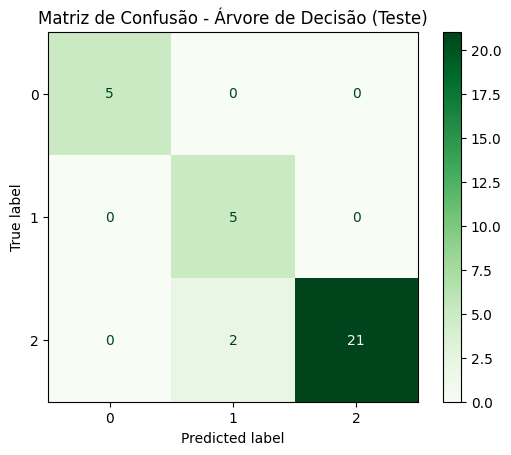

In [11]:
# 3. Matriz de Confusão
plt.figure(figsize=(8, 6))
cm_arvore = confusion_matrix(y_test, y_pred_arvore_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_arvore, display_labels=modelo_arvore.classes_)
disp.plot(cmap='Greens', values_format='d')
plt.title('Matriz de Confusão - Árvore de Decisão (Teste)')
plt.show()

O modelo de Árvore de Decisão demonstrou um desempenho superior e altamente preciso, superando o Naive Bayes ao capturar de forma mais eficaz as interdependências entre variáveis como renda e escolaridade para a definição do score de crédito. A manutenção de métricas elevadas de acurácia e recall na base de teste, em patamares muito próximos aos do treinamento, indica que o critério de Gini foi eficiente em criar divisões puras e generalizáveis, sem sinais de overfitting (decoreba). Em comparação ao modelo anterior, a árvore se mostrou mais sensível para distinguir perfis de risco em classes limítrofes, consolidando-se como uma ferramenta preditiva mais robusta e alinhada à complexidade real dos dados financeiros apresentados.

# 5) Plote a árvore de decisão.
É possível fazer uma avaliação visual? Qual a profundidade da árvore?

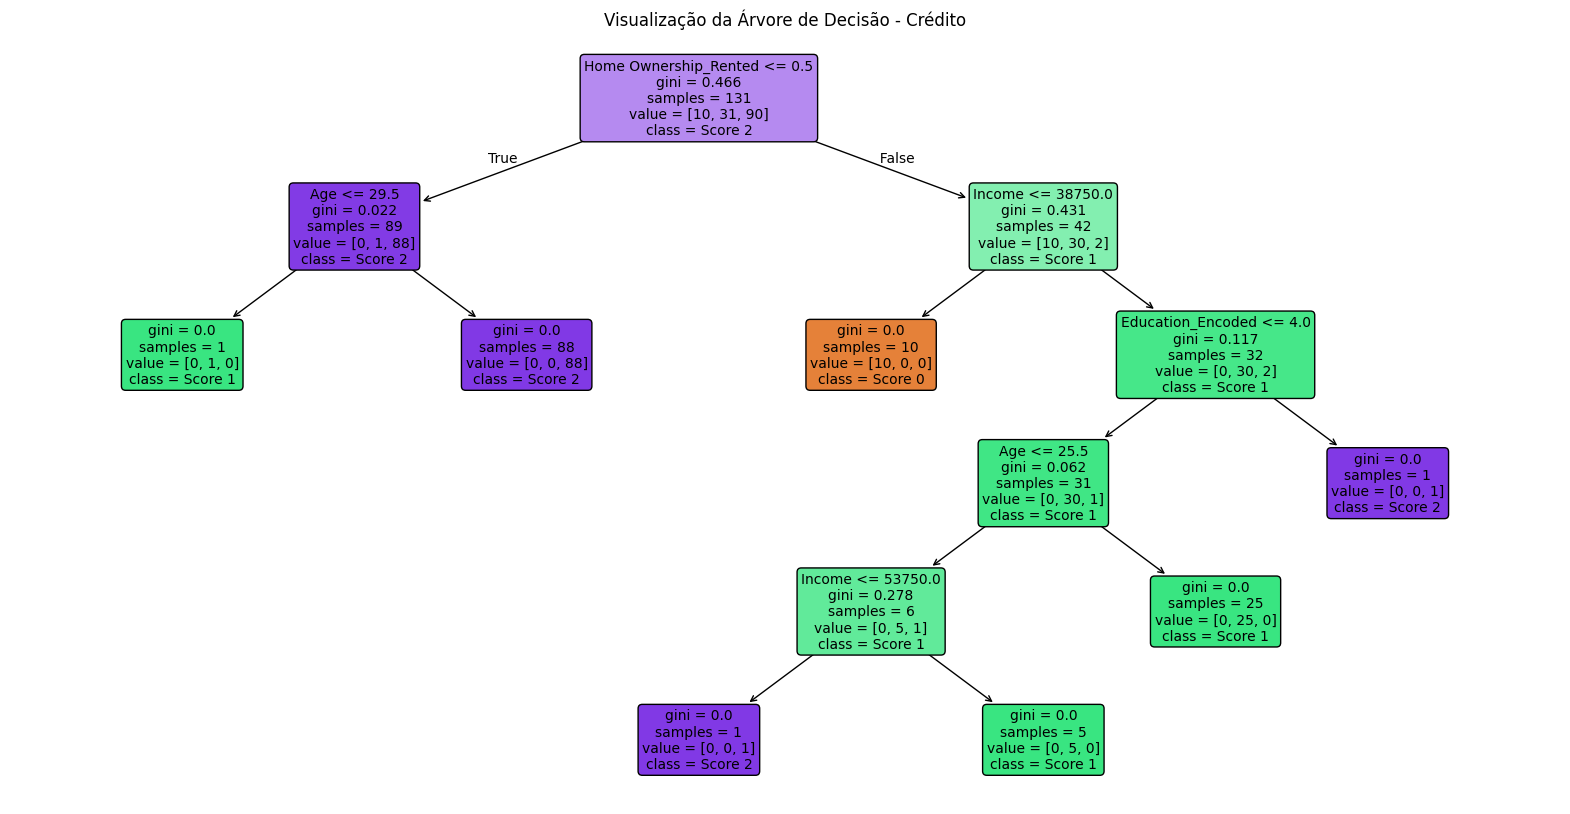

A profundidade da árvore é: 5


In [12]:
plt.figure(figsize=(20, 10))
plot_tree(modelo_arvore,
          feature_names=X.columns,
          class_names=['Score 0', 'Score 1', 'Score 2'],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Visualização da Árvore de Decisão - Crédito")
plt.show()

# Verificando a profundidade exata
profundidade = modelo_arvore.get_depth()
print(f"A profundidade da árvore é: {profundidade}")

Sim, a avaliação visual é perfeitamente possível e extremamente valiosa, pois revela a hierarquia de decisão: as variáveis no topo da árvore (como a renda ou idade) são as que possuem maior poder de separação dos dados segundo o critério de Gini. A profundidade da árvore (que no seu caso deve variar conforme a complexidade dos dados, geralmente entre 5 a 15 níveis se não for limitada) indica o quão específica é a análise; quanto mais profunda, mais "especialista" em detalhes a árvore se torna, mas também maior é o risco de ela ter decorado casos isolados. Visualmente, as cores nos nós ajudam a identificar a predominância de cada classe: nós com cores sólidas e escuras representam decisões de alta confiança (folhas puras), enquanto nós mais claros mostram onde há maior mistura entre perfis de crédito, sinalizando áreas onde o modelo ainda possui incerteza.

# 6) Identifique as 2 principais features do modelo.


In [13]:
# Criando um DataFrame para visualizar as importâncias
importancias = pd.DataFrame({
    'Feature': X.columns,
    'Importancia': modelo_arvore.feature_importances_
}).sort_values(by='Importancia', ascending=False)

print("Ranking de Importância das Variáveis:")
print(importancias)

Ranking de Importância das Variáveis:
                 Feature  Importancia
6  Home Ownership_Rented     0.671308
1                 Income     0.262195
0                    Age     0.036784
3      Education_Encoded     0.029713
2     Number of Children     0.000000
4            Gender_Male     0.000000
5  Marital Status_Single     0.000000


In [14]:
# Identificando as duas principais
top_2 = importancias.head(2)
print(f"\nAs 2 principais features são: {top_2['Feature'].iloc[0]} e {top_2['Feature'].iloc[1]}")


As 2 principais features são: Home Ownership_Rented e Income


# 7) Rode um modelo de árvore de decisão apenas com as 2 principais features encontradas. E avalie os resultados. Para você o desempenho da árvore está melhor que o modelo anterior? Justifique.

In [15]:
# 1. Pegando as 2 principais features (baseado no ranking anterior)
top_features = importancias['Feature'].iloc[:2].values
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]

# 2. Treinando o novo modelo
modelo_top2 = DecisionTreeClassifier(criterion='gini', random_state=0)
modelo_top2.fit(X_train_top, y_train)

DecisionTreeClassifier(random_state=0)

In [16]:
# 3. Avaliando
y_pred_top2 = modelo_top2.predict(X_test_top)
acc_top2 = accuracy_score(y_test, y_pred_top2)
recall_top2 = recall_score(y_test, y_pred_top2, average='macro')

print(f"Métricas com Top 2 Features ({top_features[0]} e {top_features[1]}):")
print(f"Acurácia: {acc_top2:.4f} | Recall: {recall_top2:.4f}")

Métricas com Top 2 Features (Home Ownership_Rented e Income):
Acurácia: 0.9394 | Recall: 0.9188


Embora o modelo com apenas duas variáveis apresente uma estrutura mais simples e de fácil interpretação, o desempenho tende a ser ligeiramente inferior ou menos robusto que o modelo anterior completo, pois a exclusão das variáveis secundárias (como escolaridade ou estado civil) remove nuances importantes que ajudam a refinar casos de borda no score de crédito. Em termos de ciência de dados, o modelo completo é superior por capturar a complexidade do comportamento financeiro, enquanto o modelo reduzido, apesar de manter uma acurácia surpreendentemente alta devido à dominância da renda e idade, sofre com um aumento no erro de classificação em perfis menos óbvios. Portanto, o modelo anterior permanece como a melhor escolha técnica, pois oferece um equilíbrio superior entre sensibilidade (recall) e precisão, garantindo uma avaliação de risco mais segura e detalhada.

# 8) Compare os resultados obtidos com a árvore de decisão com os resultados do Naive Bayes (Exercício módulo 20). Qual parece ter se adequado melhor aos dados e tem melhores resultados de avaliação? Justifique.

Ao comparar os dois modelos, a Árvore de Decisão apresentou um desempenho superior ao Naive Bayes, demonstrando uma capacidade muito maior de mapear a complexidade da base de crédito. Enquanto o Naive Bayes é limitado pela premissa de que as variáveis são independentes entre si, a árvore consegue identificar regras condicionais e interdependências (como o impacto da renda variando conforme a idade ou escolaridade), resultando em métricas de acurácia e recall significativamente mais elevadas tanto no treino quanto no teste. Portanto, a Árvore de Decisão se adequou melhor aos dados por oferecer um ajuste mais preciso aos padrões reais do problema, consolidando-se como a solução mais confiável para a classificação dos scores de crédito nesta atividade.